In [3]:
# imports
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# trying to load one file's data in
ach_at_baseline = loadmat("data/raw/Ach-AT/00_0315_ach-at_0.mat")

# combine the MEA data into one data frame
data = pd.DataFrame(ach_at_baseline['filt_data'])
data = data.T
time = pd.DataFrame(ach_at_baseline['filt_t'])
time = time.T
time.columns = ['time']

df_ts = pd.concat([time, data], axis=1)
df_ts = df_ts.set_index('time')

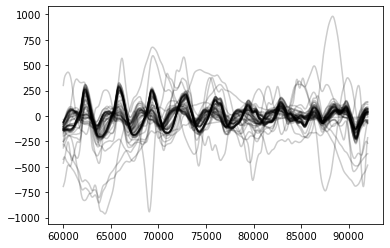

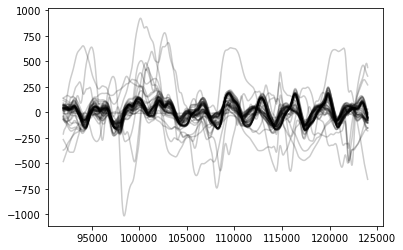

In [10]:
# what does the signal data look like on one chart
df_window = df_ts.iloc[0:32000, :]
plt.plot(df_window, 'k', alpha = 0.2)
plt.show()
df_window = df_ts.iloc[32000:64000, :]
plt.plot(df_window, 'k', alpha = 0.2)
plt.show()

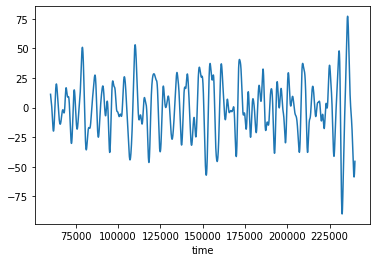

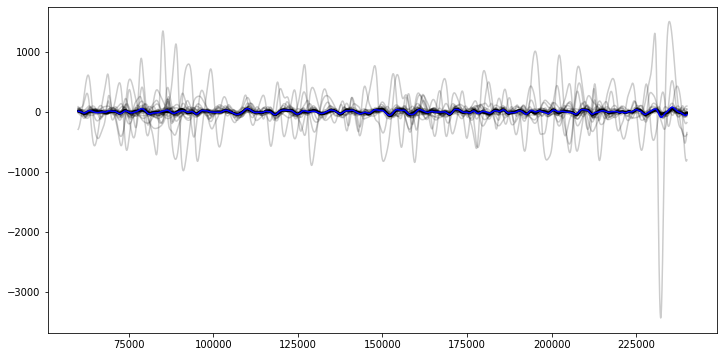

In [31]:
# what does the mean signal look like
ts_mean = df_ts.iloc[:,1:].mean(axis=1)

# overlay this plot on the all the signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_ts, 'k', alpha=0.2)
ax.plot(ts_mean, 'b')

The mean signal has a very low amplitude relative to the largest amplitude signals in the micro-electrode array, but it seemes to match the bulk of the signals fairly well. I'll proceed with using the mean as a proxy for the whole MEA for each subject.

In [32]:
# writing a method to load all the data from .mat files
## def load_MEA_data():

# get a list of the file names
d = "data/raw/"
filenames = []

for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".mat"):
            filenames.append(os.path.join(root, file))

# initialise time vectors
t0 = {'time': np.arange(60001, 240001, 1)}
t1 = {'time': np.arange(420001, 600001, 1)}
t2 = {'time': np.arange(780001, 960001, 1)}

# set up dataframes to add the values into
# baseline (0), first drug administered (1), second drug administered (2)

df_baseline = pd.DataFrame(t0)
df_first = pd.DataFrame(t1)
df_second = pd.DataFrame(t2)

for file in filenames:
    matfile = loadmat(file)
    MEA_data = pd.DataFrame(matfile['filt_data'])
    MEA_mean = pd.DataFrame(MEA_data.mean(axis=0))

    # the name of the file will be the column header
    colname = os.path.split(file)[1]
    colname = colname[:-4]
    MEA_mean.columns = [colname]

    # concatenate appropriate dataframe
    if colname.endswith("0"):
        df_baseline = pd.concat([df_baseline, MEA_mean], axis=1)
    elif colname.endswith("1"):
        df_first = pd.concat([df_first, MEA_mean], axis=1)
    else:
        df_second = pd.concat([df_second, MEA_mean], axis=1)

In [34]:
# NEXT STEPS: EXPORT DATAFRAMES TO CSV IN data/interim
export_path = "data/interim/"
df_baseline.to_csv(export_path+"baseline_means.csv")
df_first.to_csv(export_path+"first_means.csv")
df_second.to_csv(export_path+"second_means.csv")


We have reduced the size of the data considerably, all 3 files combine to be 172 MB